In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('./dataset/label지정.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도_x,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10481,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10482,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10483,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


## 윈저라이징 처리

In [5]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도_x', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)

# Ridge

In [8]:
feature = df_1.drop(columns='label')
target = df_1['label']

#릿지 클래서
ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

ridge_alphas =[1000,2000,3000,4000,5000]
for alpha in ridge_alphas :
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:.10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(ridge_alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(feature,target)
    coeff = pd.Series(data=ridge.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
#     axs[pos].set_title(colname)
#     axs[pos].set_xlim(-3,6)
#     sns.barplot(x=coeff.values, y=coeff.index, ax =axs[pos])

# plt.show()

[-0.01083252 -0.01583743 -0.01149156 -0.01494932 -0.0118772 ] [0.10407941 0.12584684 0.1071987  0.12226742 0.10898257] 0.11367498779489668
alpha 1000 일 떄 5folds 의 평균 RMSE : 0.1136804850
alpha 2000 일 떄 5folds 의 평균 RMSE : 0.1137072121
alpha 3000 일 떄 5folds 의 평균 RMSE : 0.1137216390
alpha 4000 일 떄 5folds 의 평균 RMSE : 0.1137308962
alpha 5000 일 떄 5folds 의 평균 RMSE : 0.1137372542


## Ridge의 알파를 조정해 값 확인

In [9]:
ridge_alphas =[1000,2000,3000,4000,5000]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:1000,alpha:2000,alpha:3000,alpha:4000,alpha:5000
[제조]순운전자본회전률,6.973753e-03,4.012492e-03,2.756504e-03,2.065047e-03,1.630155e-03
[제조]총자본회전률,5.427015e-03,2.795688e-03,1.786608e-03,1.265197e-03,9.525538e-04
[제조]비유동자산회전률,1.792822e-03,1.682733e-03,1.532923e-03,1.393357e-03,1.270590e-03
[제조]운전자본회전률,1.549225e-03,1.202790e-03,9.808328e-04,8.275429e-04,7.153921e-04
[제조]유동자산회전률,9.352702e-04,7.333009e-04,4.678340e-04,2.793329e-04,1.488999e-04
[제조]매출채권회전률,7.600413e-04,7.589200e-04,7.578827e-04,7.565238e-04,7.549227e-04
[제조]유동자산구성비율,6.950552e-04,6.333245e-04,5.983676e-04,5.757028e-04,5.596884e-04
[제조]총자본사업이익률,4.149152e-04,4.326827e-04,4.397398e-04,4.427331e-04,4.437159e-04
[제조]자기자본구성비율,3.542577e-04,3.674563e-04,3.717596e-04,3.731123e-04,3.731482e-04
[제조]매입채무회전기간,1.436712e-04,1.444661e-04,1.451193e-04,1.456398e-04,1.460681e-04


# Lasso

In [10]:

feature = df_1.drop(columns='label')
target = df_1['label']

lasso = Lasso(alpha = 10)
lasso_alphas =[0,1,0.03,0.04,0.05,0.1]

neg_mse_scores = cross_val_score(lasso, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

# lasso_alphas =[100,10000,10000]
for alpha in lasso_alphas :
    lasso = Lasso(alpha = alpha)
    neg_mse_scores = cross_val_score(lasso, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(lasso_alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(feature,target)
    coeff = pd.Series(data=lasso.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

[-0.01124908 -0.01720613 -0.01218077 -0.01539911 -0.01267597] [0.10606167 0.13117214 0.11036652 0.12409314 0.1125876 ] 0.11685621574036827


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.044498513686456, tolerance: 0.012119635193133055
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estima

alpha 0 일 떄 5folds 의 평균 RMSE :   0.113716
alpha 1 일 떄 5folds 의 평균 RMSE :   0.115963
alpha 0.03 일 떄 5folds 의 평균 RMSE :   0.113599
alpha 0.04 일 떄 5folds 의 평균 RMSE :   0.113624
alpha 0.05 일 떄 5folds 의 평균 RMSE :   0.113656
alpha 0.1 일 떄 5folds 의 평균 RMSE :   0.113825


<ipython-input-10-4d085b2091dc>:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(feature,target)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.17577594150262, tolerance: 0.01449390557939916
  model = cd_fast.enet_coordinate_descent(


## Lasso의 알파를 조정해 값 확인

In [11]:
lasso_alphas =[0,0.01,0.03,0.04,0.05]

sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0,alpha:1,alpha:0.03,alpha:0.04,alpha:0.05,alpha:0.1
[제조]총자본회전률,3.146048e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
[제조]순운전자본회전률,2.116306e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
[제조]1회전기간,1.509228e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
[제조]운전자본회전률,1.998974e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
[제조]비유동자산회전률,9.409503e-04,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
[제조]매출채권회전률,7.668542e-04,0.000000e+00,2.364699e-05,0.000000e+00,0.000000e+00,0.000000e+00
[제조]유동자산구성비율,7.616900e-04,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
[제조]총자본사업이익률,3.351343e-04,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
[제조]자기자본구성비율,2.793336e-04,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
[제조]부채비율,1.728461e-04,5.216581e-05,7.897560e-05,6.754095e-05,5.913700e-05,8.079527e-05


In [12]:
a = coeff_df[coeff_df["alpha:0.03"]!=0]                     ## 알파값이 0.03일때 0값이 아닌 데이터
a = a["alpha:0.03"].abs()                                   ## 해당 데이터의 절대값
a

[제조]유형자산증가율         7.233317e-06
[제조]비유동자산증가율        4.754104e-05
[제조]총자본증가율          1.344786e-04
[제조]자기자본증가율         6.606218e-06
[제조]순이익증가율          5.937409e-09
[제조]재고자산증가율         2.495307e-05
[제조]매출액순이익률         1.279450e-04
[제조]자기자본순이익률        5.222472e-04
[제조]1주당순이익          9.468674e-06
[제조]1주당매출액          1.579034e-07
[제조]재고자산회전률         3.566600e-06
[제조]매출채권회전률         2.364699e-05
[제조]매입채무회전률         2.829894e-06
[제조]매입채무회전기간        1.239126e-04
[제조]재고자산회전기간        2.788110e-05
[제조]매출채권회전기간        3.775470e-05
[제조]유동비율            8.459753e-06
[제조]당좌비율            1.974815e-06
[제조]현금비율            3.549235e-06
[제조]부채비율            7.897560e-05
[제조]순운전자본비율         3.919701e-04
[제조]자기자본배율          2.448752e-06
[제조]비유동비율           7.099960e-05
[제조]부가가치            7.063365e-08
[제조]총자본투자효율         1.172469e-04
[제조]설비투자효율          2.173921e-06
[제조]기계투자효율          4.830245e-09
[제조]부가가치율           8.631981e-05
[제조]노동소득분배율         7.680138e-05
[제조]자본분배율           6.376208e-05
[제조]이자보상배율

In [13]:
a= pd.DataFrame(a)
a=a.sort_values(["alpha:0.03"],ascending=True)
a

,alpha:0.03
[제조]기계투자효율,4.830245e-09
[제조]순이익증가율,5.937409e-09
[제조]부가가치,7.063365e-08
[제조]1주당매출액,1.579034e-07
[제조]당좌비율,1.974815e-06
[제조]설비투자효율,2.173921e-06
[제조]자기자본배율,2.448752e-06
[제조]매입채무회전률,2.829894e-06
[제조]이자보상배율(이자비용),3.037250e-06
[제조]현금비율,3.549235e-06


In [14]:

feature = pd.DataFrame(a)
feature.index 
feature = df[['[제조]노동소득분배율','[제조]비유동자산증가율', '[제조]부채비율',
            '[제조]총자본투자효율', '[제조]매입채무회전기간', '[제조]매출액순이익률',
            '[제조]총자본증가율', '[제조]순운전자본비율', '[제조]자기자본순이익률']]

### 피처 선정을 위한 VIF & 히트맵

In [15]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)
# vif 랑 회귀계수 비교해서 vif가 크면서 회귀계수가 작은얘들을 제거

,VIF Factor,features
0,1.523278,[제조]순운전자본비율
1,1.497246,[제조]총자본투자효율
2,1.470721,[제조]총자본증가율
3,1.380020,[제조]비유동자산증가율
4,1.153694,[제조]매입채무회전기간
5,1.040907,[제조]매출액순이익률
6,1.031671,[제조]부채비율
7,1.004488,[제조]자기자본순이익률
8,1.003715,[제조]노동소득분배율


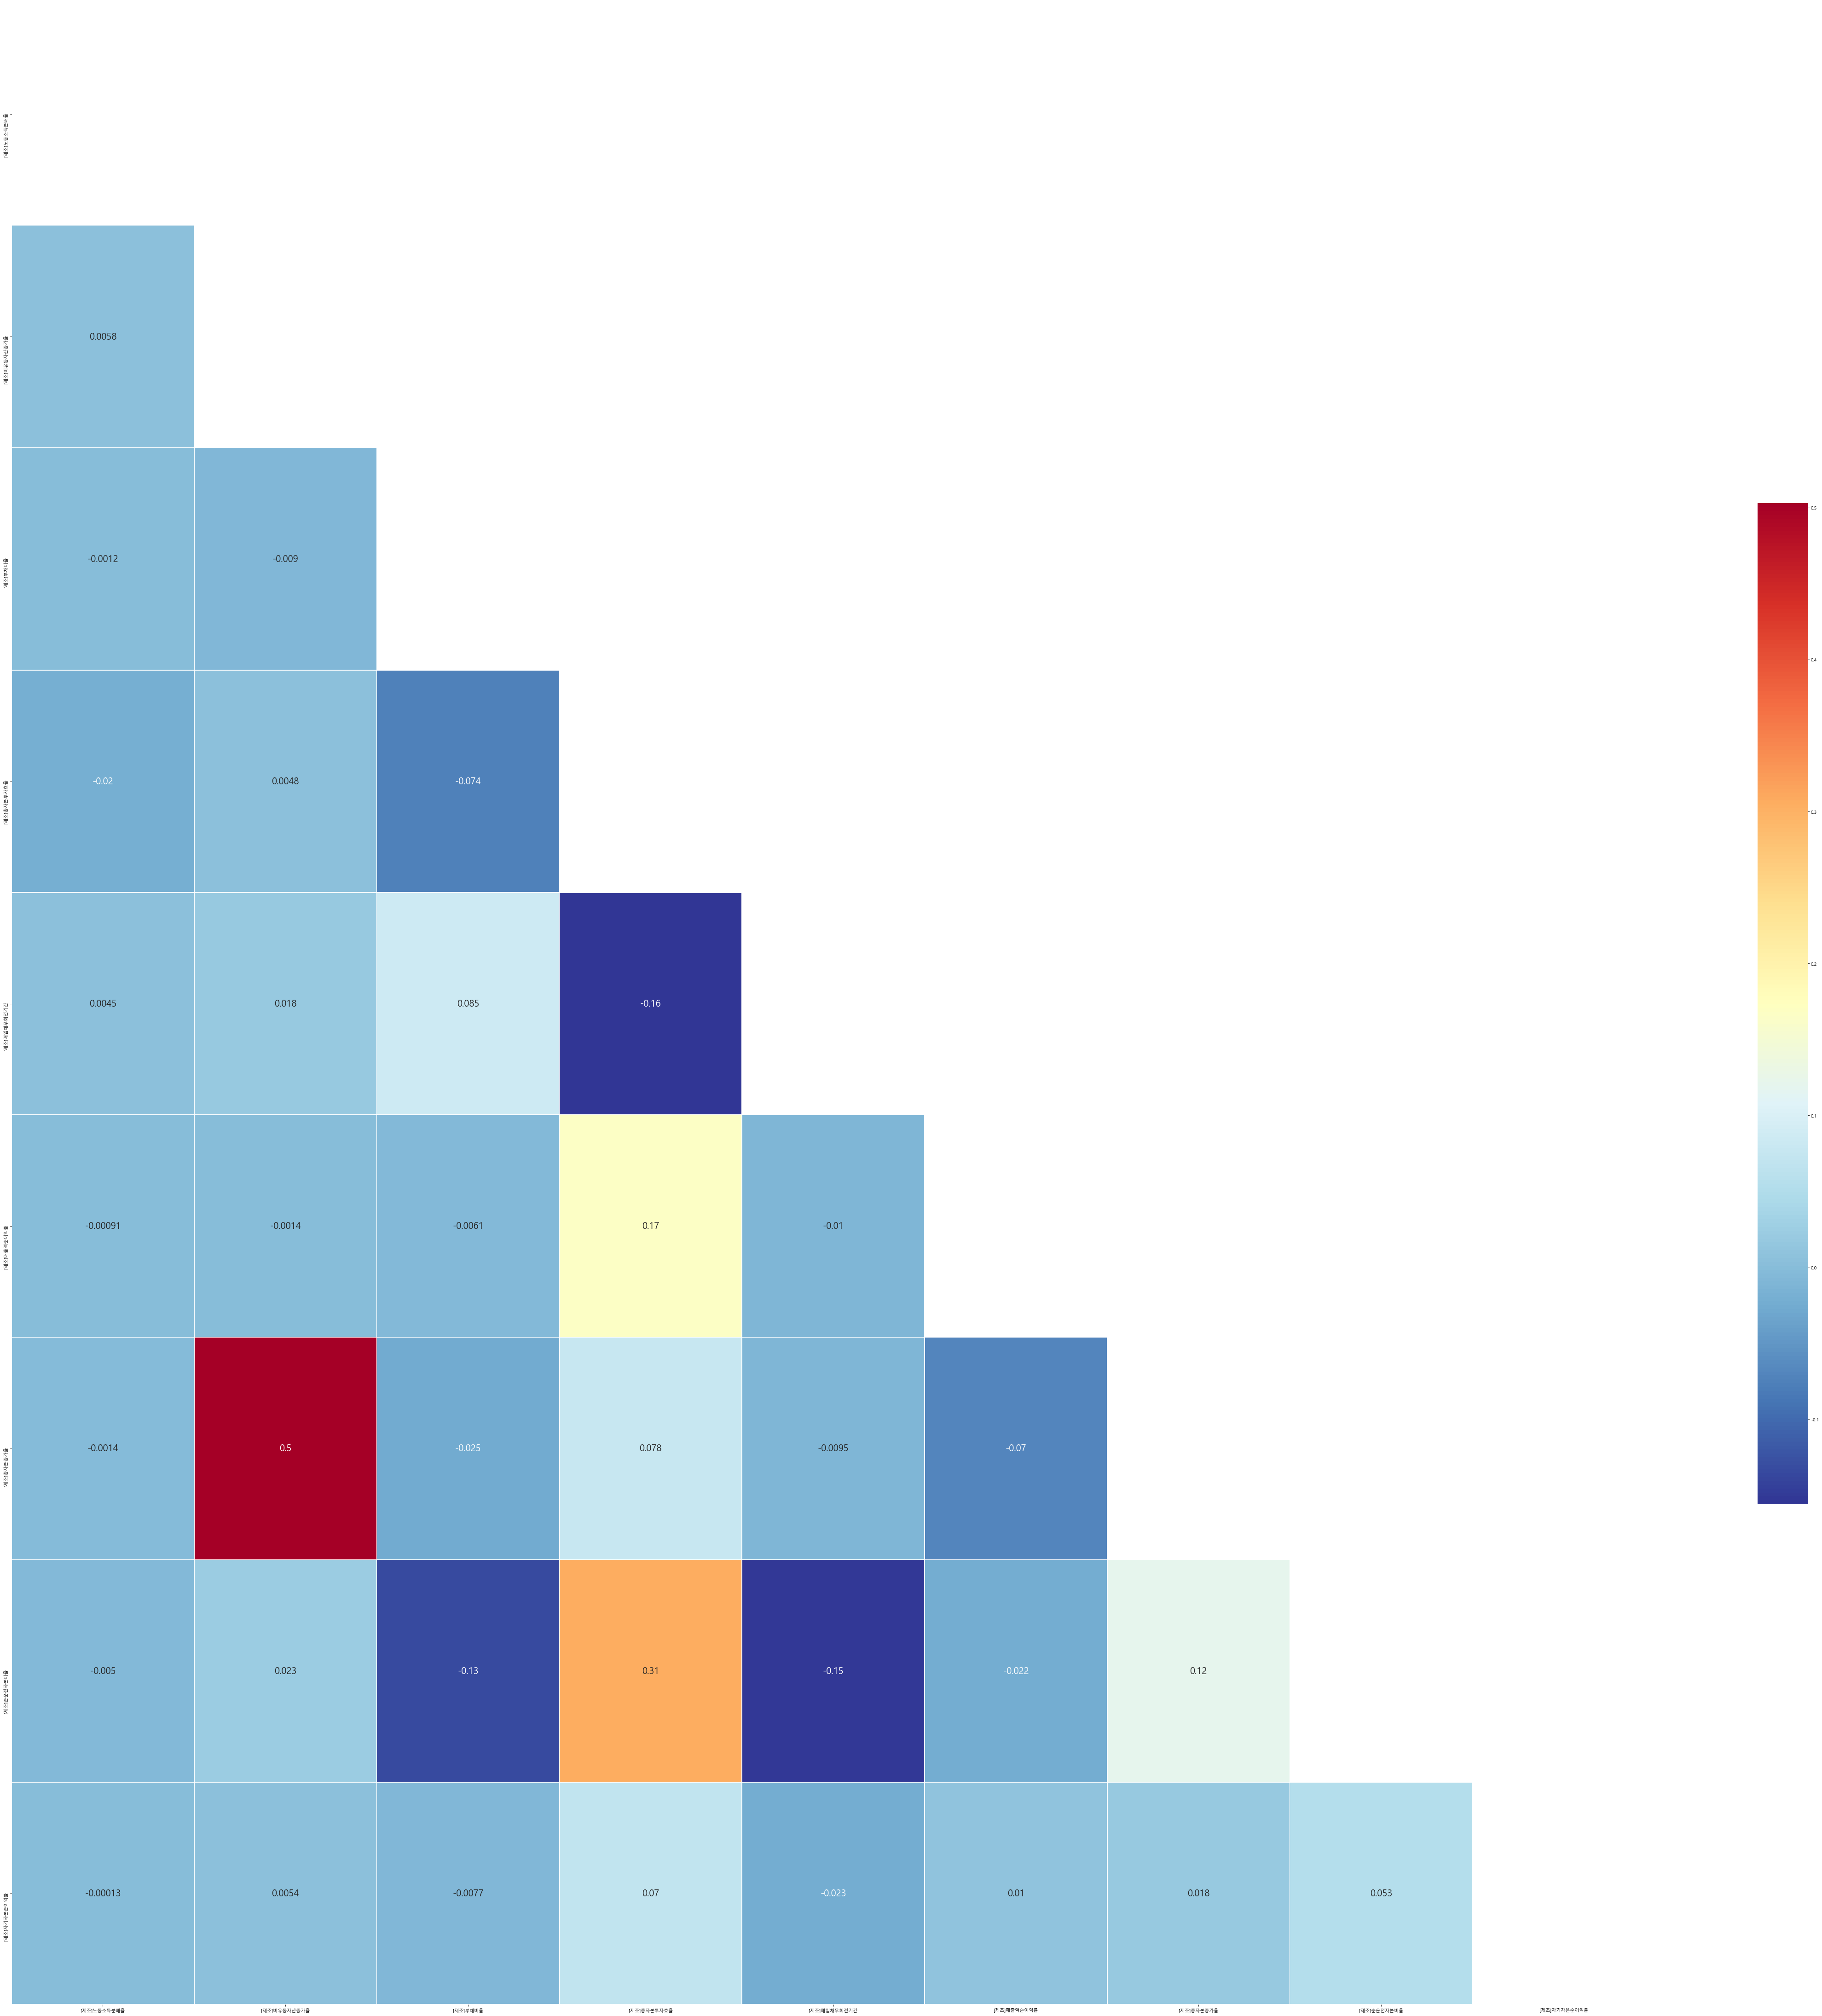

In [16]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(feature)

# ElasticNet

In [17]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha = 10)
elasticNet_alphas =[0.04,0.05,0.06,0.07,0.08]

feature = df_1.drop(columns='label')
target = df_1['label']


neg_mse_scores = cross_val_score(elasticNet, feature, target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores,rmse_scores,avg_rmse)

for alpha in elasticNet_alphas :
    elasticNet  = ElasticNet(alpha = alpha, l1_ratio=0.5)
    neg_mse_scores = cross_val_score(elasticNet, feature, target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 떄 5folds 의 평균 RMSE : {1:10f}' .format(alpha,avg_rmse))

# fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(elasticNet_alphas):
    
    elasticNet = ElasticNet(alpha = alpha, l1_ratio=0.5)
    elasticNet.fit(feature,target)
    coeff = pd.Series(data=elasticNet.coef_, index=feature.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

[-0.01119489 -0.01716795 -0.01213731 -0.01534101 -0.01261969] [0.10580589 0.13102654 0.11016948 0.12385884 0.1123374 ] 0.11663962912511276
alpha 0.04 일 떄 5folds 의 평균 RMSE :   0.113606
alpha 0.05 일 떄 5folds 의 평균 RMSE :   0.113595
alpha 0.06 일 떄 5folds 의 평균 RMSE :   0.113599
alpha 0.07 일 떄 5folds 의 평균 RMSE :   0.113610
alpha 0.08 일 떄 5folds 의 평균 RMSE :   0.113624


In [18]:
elasticNet_alphas =[0.04,0.05,0.06,0.07,0.08]               # l1_ratio = 0.5, alphas =0.05 최적

sort_column = 'alpha:'+str(elasticNet_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0.04,alpha:0.05,alpha:0.06,alpha:0.07,alpha:0.08
[제조]매출채권회전률,2.548520e-04,1.392396e-04,2.363097e-05,0.000000e+00,0.000000e+00
[제조]매입채무회전기간,1.303236e-04,1.272763e-04,1.239103e-04,1.204047e-04,1.167316e-04
[제조]부채비율,8.802496e-05,8.363003e-05,7.897287e-05,7.306826e-05,6.754114e-05
[제조]매출채권회전기간,6.256665e-05,5.020259e-05,3.775186e-05,3.413904e-05,3.312608e-05
[제조]자기자본증가율,2.143965e-05,1.413845e-05,6.601383e-06,0.000000e+00,0.000000e+00
[제조]유동비율,1.318219e-05,1.170348e-05,8.454970e-06,3.151074e-06,0.000000e+00
[제조]유형자산증가율,9.786066e-06,8.521906e-06,7.233077e-06,5.688249e-06,4.263886e-06
[제조]1주당순이익,9.764533e-06,9.617513e-06,9.468263e-06,9.288822e-06,9.085003e-06
[제조]재고자산회전률,3.511118e-06,3.546621e-06,3.566483e-06,3.556631e-06,3.580202e-06
[제조]이자보상배율(이자비용),3.216511e-06,3.126959e-06,3.037187e-06,2.951722e-06,2.884120e-06


In [19]:
a = coeff_df[coeff_df["alpha:0.05"]!=0]
a = a["alpha:0.05"].abs()
a

[제조]유형자산증가율         8.521906e-06
[제조]비유동자산증가율        4.940531e-05
[제조]총자본증가율          1.457765e-04
[제조]자기자본증가율         1.413845e-05
[제조]순이익증가율          3.477874e-08
[제조]재고자산증가율         2.520794e-05
[제조]매출액순이익률         1.277966e-04
[제조]자기자본순이익률        5.252347e-04
[제조]1주당순이익          9.617513e-06
[제조]1주당매출액          1.625295e-07
[제조]재고자산회전률         3.546621e-06
[제조]매출채권회전률         1.392396e-04
[제조]매입채무회전률         4.557864e-06
[제조]매입채무회전기간        1.272763e-04
[제조]재고자산회전기간        3.233982e-05
[제조]매출채권회전기간        5.020259e-05
[제조]유동비율            1.170348e-05
[제조]현금비율            4.354272e-06
[제조]부채비율            8.363003e-05
[제조]순운전자본비율         4.372401e-04
[제조]자기자본배율          2.400587e-06
[제조]비유동비율           8.921264e-05
[제조]부가가치            6.870604e-08
[제조]총자본투자효율         1.374592e-04
[제조]설비투자효율          2.254479e-06
[제조]기계투자효율          5.013871e-09
[제조]부가가치율           7.700340e-05
[제조]노동소득분배율         8.692368e-05
[제조]자본분배율           7.431189e-05
[제조]이자보상배율(이자비용)    3.126959e-06
Name: alph

In [20]:
a= pd.DataFrame(a)
a=a.sort_values(["alpha:0.05"],ascending=True)
a

,alpha:0.05
[제조]기계투자효율,5.013871e-09
[제조]순이익증가율,3.477874e-08
[제조]부가가치,6.870604e-08
[제조]1주당매출액,1.625295e-07
[제조]설비투자효율,2.254479e-06
[제조]자기자본배율,2.400587e-06
[제조]이자보상배율(이자비용),3.126959e-06
[제조]재고자산회전률,3.546621e-06
[제조]현금비율,4.354272e-06
[제조]매입채무회전률,4.557864e-06


In [21]:
feature = pd.DataFrame(a)
feature.index 
feature = df[['[제조]노동소득분배율', '[제조]비유동비율','[제조]매입채무회전기간', 
            '[제조]매출액순이익률', '[제조]총자본투자효율', '[제조]매출채권회전률',
            '[제조]총자본증가율', '[제조]순운전자본비율', '[제조]자기자본순이익률']]

In [22]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)

,VIF Factor,features
0,1.533364,[제조]순운전자본비율
1,1.510722,[제조]총자본투자효율
2,1.182426,[제조]매입채무회전기간
3,1.090089,[제조]총자본증가율
4,1.072024,[제조]비유동비율
5,1.039853,[제조]매출액순이익률
6,1.018103,[제조]매출채권회전률
7,1.004513,[제조]자기자본순이익률
8,1.003772,[제조]노동소득분배율
